# 📊 Netflix User Behavior Analysis

**Objective:**  
To analyze Netflix user data to uncover behavioral patterns like popular genres, binge-watching habits, and rating trends.

**Dataset Columns:**  
- User_ID  
- Show_Title  
- Genre  
- Watch_Duration (in minutes)  
- Date_Watched  
- Rating (1 to 5 stars)


## 🔹 Step 1: Load the Dataset
Read the CSV file and preview the first few rows.


In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\user\Downloads\netflix_user_behavior.csv")  
df.head()

,User_ID,Show_Title,Genre,Watch_Duration,Date_Watched,Rating
0,U039,Show_36,Drama,132,2025-06-10,2
1,U029,Show_38,Documentary,59,2025-06-05,3
2,U015,Show_84,Drama,21,2025-06-27,1
3,U043,Show_99,Drama,63,2025-06-10,2
4,U008,Show_89,Documentary,142,2025-06-01,3


## 🔹 Step 2: Analyze Top 5 Most Watched Genres
Count how many times each genre was watched and visualize the top 5.

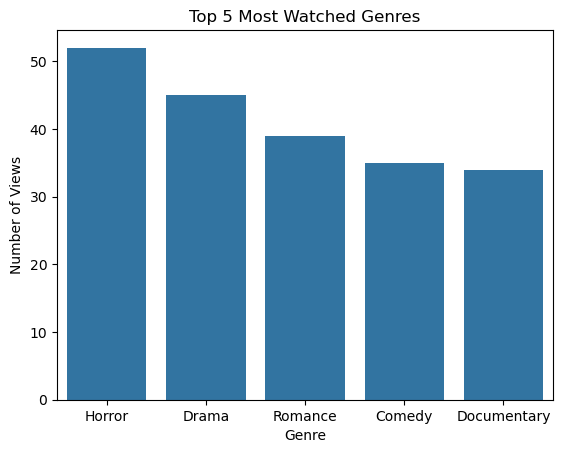

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

top_genres = df['Genre'].value_counts().head(5)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Top 5 Most Watched Genres")
plt.ylabel("Number of Views")
plt.xlabel("Genre")
plt.show()

## 🔹 Step 3: Total Watch Hours per User
Calculate how many hours each user spent watching and visualize the top 10.

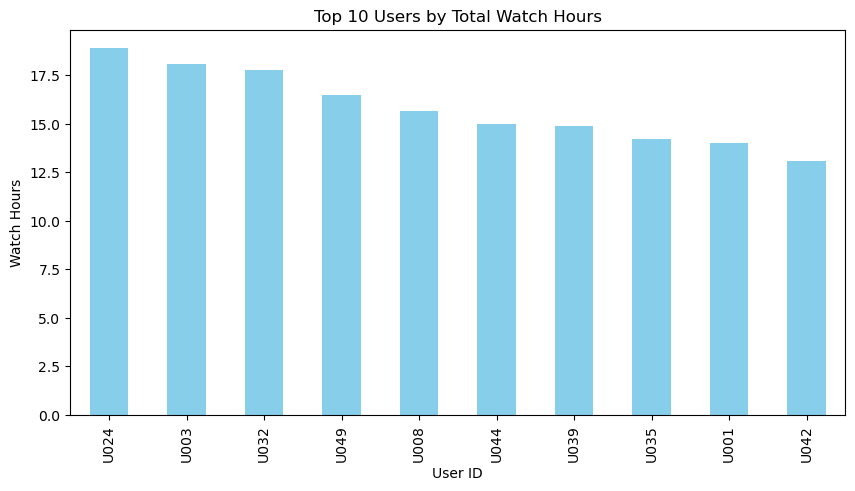

In [10]:
user_watch_time = df.groupby('User_ID')['Watch_Duration'].sum().sort_values(ascending=False)
user_watch_time = user_watch_time / 60  

user_watch_time.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Top 10 Users by Total Watch Hours")
plt.ylabel("Watch Hours")
plt.xlabel("User ID")
plt.show()

## 🔹 Step 4: Binge Behavior Analysis
Identify users who watched more than 3 hours of content on the same day. These are considered binge sessions.

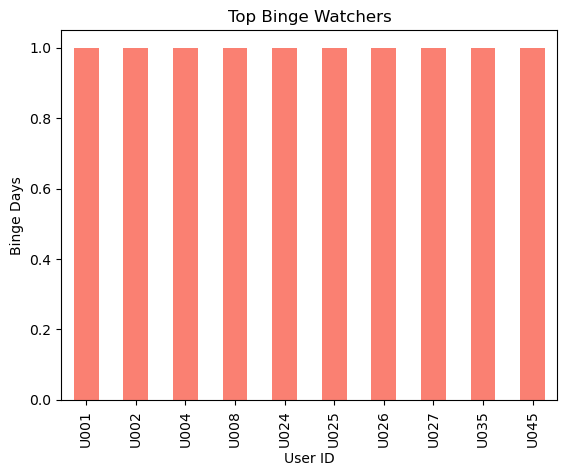

In [14]:
daily_watch = df.groupby(['User_ID', 'Date_Watched'])['Watch_Duration'].sum().reset_index()
binge_watch = daily_watch[daily_watch['Watch_Duration'] > 180]  

binge_count = binge_watch['User_ID'].value_counts().head(10)
binge_count.plot(kind='bar', color='salmon')
plt.title("Top Binge Watchers")
plt.ylabel("Binge Days")
plt.xlabel("User ID")
plt.show()

## 🔹 Step 5: Ratings Distribution by Genre
Visualize how users rated shows in each genre using a boxplot.

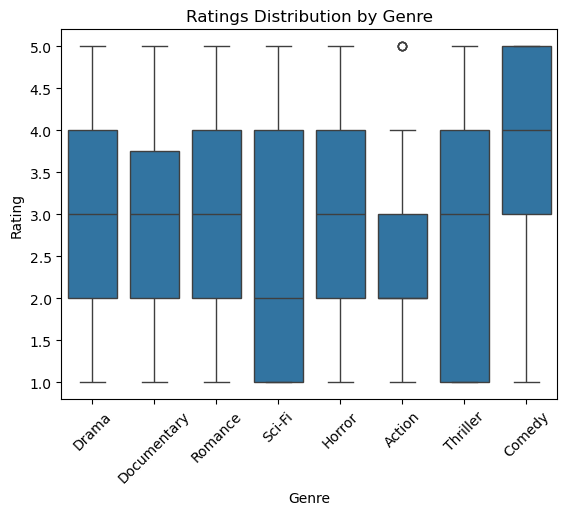

In [16]:
sns.boxplot(data=df, x='Genre', y='Rating')
plt.title("Ratings Distribution by Genre")
plt.xticks(rotation=45)
plt.show()

## ✅ Conclusion & Insights

- **Most Popular Genres:** Drama and Comedy dominate user preferences.
- **Top Watchers:** Certain users consistently log high watch hours, indicating heavy consumption.
- **Binge Patterns:** A few users binge content frequently, which could be targeted for personalized content drops.
- **Ratings by Genre:** Some genres like Documentaries or Thrillers receive higher average ratings.

These insights can help recommend content more effectively and understand viewer behavior in depth.
